In [16]:
from __future__ import print_function
import matplotlib.pyplot as plt
from PIL import Image
import site
import numpy as np
import os
import sys
import tarfile
from IPython.display import display
from IPython.display import Image as image2
#from PIL import Image
from scipy import ndimage
from os.path import isfile, join
import h5py

from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle


# the usual beautification line
%matplotlib inline


In [17]:

print("folder test sample: %s" % os.listdir('ownpic')[:])


folder test sample: ['2.png', '2006.png', '2012.png', '789.png', '80.png']


In [18]:
ownfiles = [f for f in os.listdir('test') if isfile(join('ownpic', f))]

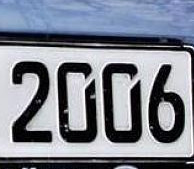

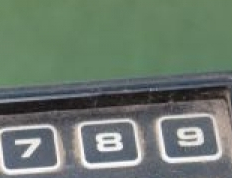

In [19]:
display(image2(filename="ownpic/2006.png"))
display(image2(filename="ownpic/789.png"))

In [20]:
dim_array1 = []
def get_dimensions(archives):
    for i in archives:
        with Image.open("ownpic/"+i) as im:
            width, height = im.size
            dim_array1.append((width,height))
     

get_dimensions(ownfiles)
print(dim_array1[:])


[(223, 184), (194, 169), (176, 159), (232, 178), (281, 270)]


In [21]:
def resize_img(archives):
    for i in archives:
        with Image.open("ownpic/"+i) as im:         
            im = im.resize([32,32], Image.ANTIALIAS)
            im.save("ownpic/"+i)
          
                           
resize_img(ownfiles)                       

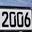

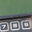

In [22]:
display(image2(filename="ownpic/2006.png"))
display(image2(filename="ownpic/789.png"))

In [23]:
folder = "ownpic/"
image_files = os.listdir(folder)
channels = 3
image_size = 32
dataset = np.ndarray(shape=(len(image_files), image_size, image_size, channels),
                         dtype=np.float32)

dataset.shape[:]


(5, 32, 32, 3)

In [24]:
image_size = 32  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.


def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size,channels),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size,channels):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :,:] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :,:]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
own_dataset = load_letter(folder,5)

ownpic/
Full dataset tensor: (5, 32, 32, 3)
Mean: 0.0371244
Standard deviation: 0.277558


In [25]:
dataset.shape[:]

(5, 32, 32, 3)

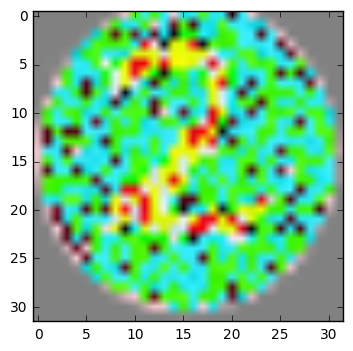

In [26]:
img=own_dataset[0,:,:,:]
plt.imshow(img)

In [32]:
def greyimg(data): 
    coeff_red = 0.299
    coeff_green = 0.587
    coeff_blue = 0.1114
    data = data[:,:,:,0]*coeff_red+data[:,:,:,1]*coeff_green+data[:,:,:,2]*coeff_blue
    return data

own_dataset = greyimg(own_dataset)

In [33]:
own_labels = np.array([[1, 2,10,10,10,10],[4, 2, 0, 0, 6,10],[4, 2, 0, 1, 2,10],[3, 7, 8, 9,10,10],[2, 8, 0,10,10,10]])
#own_labels = own_labels.tolist()
#hdf5 requires all dimensions to have the same shape ,therefore 10's added
print(own_labels[0])

[ 1  2 10 10 10 10]


In [34]:
mlreadyfile = h5py.File('ownnumbers.hdf5')
mlreadyfile['own_dataset']=own_dataset
mlreadyfile['own_labels']=own_labels
mlreadyfile.close()
print('done deal')

done deal


In [35]:
statinfo = os.stat('ownnumbers.hdf5')
print('size:', statinfo.st_size)


size: 22864
